## KNN Algorithm
## Simple KNN for Classifiation Problem

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

In [3]:
X.shape,y.shape

((1797, 64), (1797,))

In [4]:
# Assuming y is your numpy array
import numpy as np

unique, counts = np.unique(y, return_counts=True)
value_counts = dict(zip(unique, counts))

print(value_counts)

{0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Define parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (p=1) and Euclidean (p=2)
}

In [7]:
# Initialize KNN and GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [8]:
# Get the results
results = grid_search.best_params_
results

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

In [9]:
y_pred = grid_search.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9888888888888889

## KNN Regressor

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Define parameter grid for KNN Regressor
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (p=1) and Euclidean (p=2)
}

# Initialize KNN Regressor and GridSearchCV
knn_regressor = KNeighborsRegressor()
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [13]:
# Predict on the test set
y_pred = grid_search.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error on the test set: {mse:.2f}")
print(f"Root Mean Squared Error on the test set: {rmse:.2f}")
print(f"Mean Absolute Error on the test set: {mae:.2f}")
print(f"R-squared on the test set: {r2:.2f}")


Mean Squared Error on the test set: 0.97
Root Mean Squared Error on the test set: 0.98
Mean Absolute Error on the test set: 0.76
R-squared on the test set: 0.26


### Extract and Plot Results

In [14]:
# Get the results
results = grid_search.cv_results_

# Extract relevant results
mean_test_scores = -results['mean_test_score']  # Convert negative MSE to positive
param_n_neighbors = results['param_n_neighbors'].data

In [15]:
print(mean_test_scores)
print(param_n_neighbors)

[1.10871596 1.09259337 1.24186305 1.21910029 1.05736263 1.03026938
 1.19132598 1.15757375 1.04654187 1.01434831 1.17105548 1.1359014
 1.04420947 1.00986417 1.16730309 1.12965697]
[3 3 3 3 5 5 5 5 7 7 7 7 9 9 9 9]


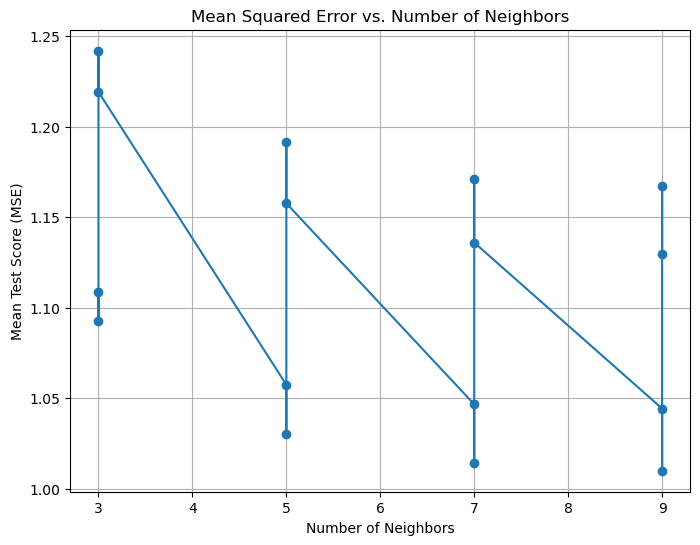

In [16]:
# Plot
plt.figure(figsize=(8, 6))
plt.plot(param_n_neighbors, mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score (MSE)')
plt.title('Mean Squared Error vs. Number of Neighbors')
plt.grid(True)
plt.show()

### Heatmap of Accuracy for Different Parameters

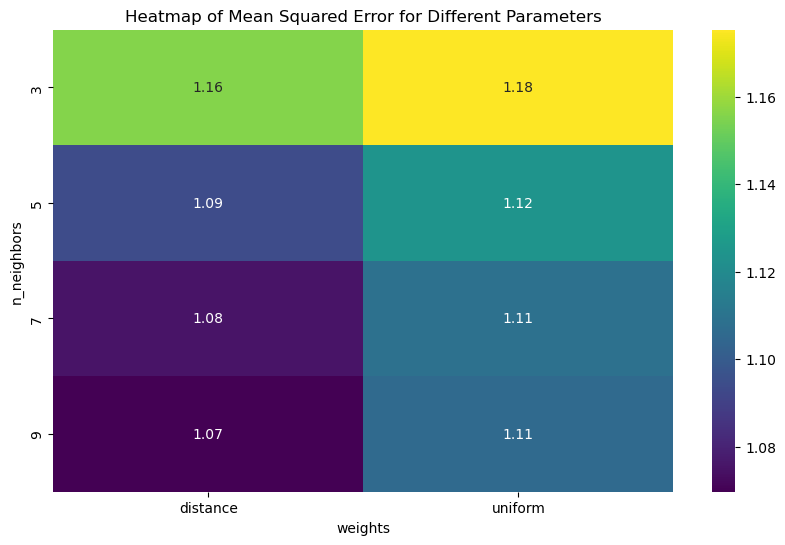

In [17]:
# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'n_neighbors': results['param_n_neighbors'].data,
    'weights': results['param_weights'].data,
    'mean_test_score': -results['mean_test_score']  # Convert negative MSE to positive
})

# Pivot DataFrame for heatmap
heatmap_data = df.pivot_table(index='n_neighbors', columns='weights', values='mean_test_score')

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Mean Squared Error for Different Parameters')
plt.show()


## KNN Classifier

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Define parameter grid for KNN Classifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (p=1) and Euclidean (p=2)
}

# Initialize KNN Classifier and GridSearchCV
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [20]:
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

### Extract and Plot Results

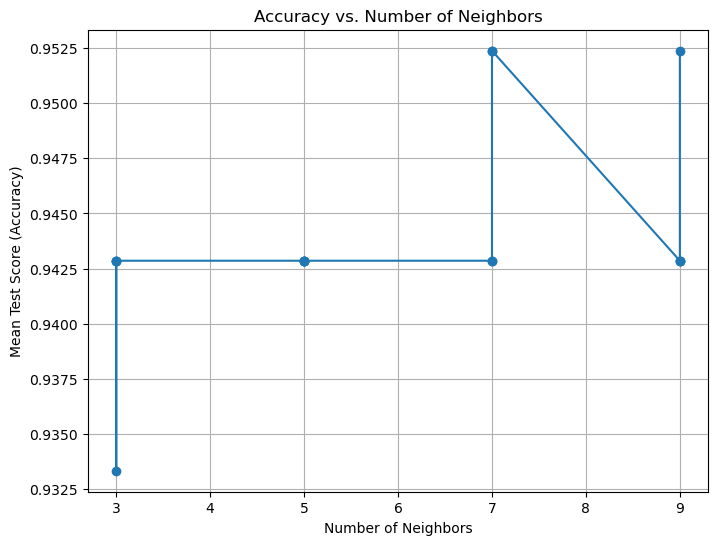

In [21]:
# Extract relevant results
# Get the results
results = grid_search.cv_results_

mean_test_scores = results['mean_test_score']
param_n_neighbors = results['param_n_neighbors'].data

# Plot
plt.figure(figsize=(8, 6))
plt.plot(param_n_neighbors, mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()


### Heatmap of Accuracy for Different Parameters

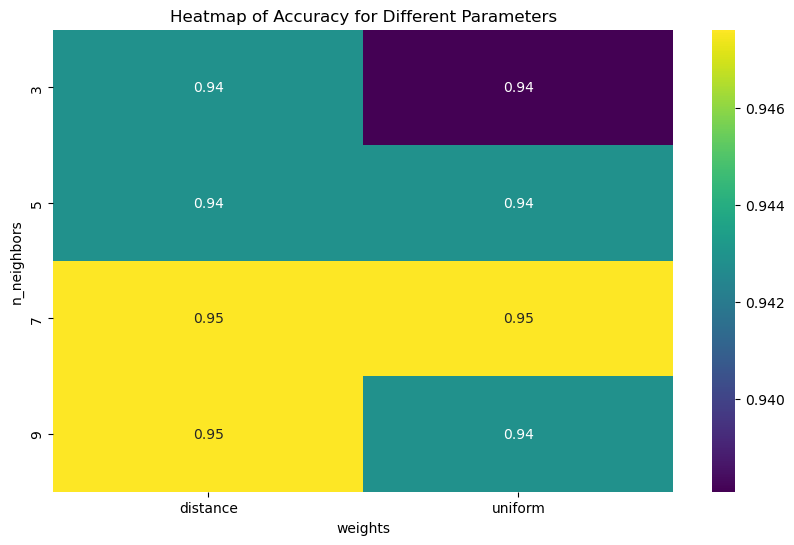

In [22]:
# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'n_neighbors': results['param_n_neighbors'].data,
    'weights': results['param_weights'].data,
    'mean_test_score': results['mean_test_score']
})

# Pivot DataFrame for heatmap
heatmap_data = df.pivot_table(index='n_neighbors', columns='weights', values='mean_test_score')

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Accuracy for Different Parameters')
plt.show()


### `weights` Parameter in KNN

1. **`uniform`**:
   - **Description**: When using `uniform`, all neighbors have the same weight in the prediction. In other words, each neighbor contributes equally to the prediction.
   - **Effect**: This option means that the algorithm does not differentiate between closer and further neighbors; each neighbor's influence is the same.

2. **`distance`**:
   - **Description**: When using `distance`, the weight of each neighbor is inversely proportional to its distance from the query point. Neighbors that are closer to the query point will have more influence on the prediction than neighbors that are further away.
   - **Effect**: This option allows the algorithm to consider the distance of neighbors, giving more weight to closer neighbors and less weight to further ones, which can be beneficial if the density of data points varies.

### How They Affect the KNN Algorithm

- **`uniform`**: This is useful when you believe that all neighbors should be equally important in making a prediction. It can be effective in datasets where all data points are equally relevant, regardless of their distance.

- **`distance`**: This often results in better performance when you want to give more importance to closer neighbors, which might be the case if you think that the immediate neighbors are more relevant to the prediction. It can be more sensitive to outliers if the distances vary widely.

#### Prepared By,
Ahamed Basith